In [82]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from imblearn.over_sampling import SMOTE
from tensorflow import keras
import xgboost as xgb
from xgboost import XGBClassifier

In [83]:
x_src_path = '../../Dataset/mixed_text_assignment.json'
y_src_path = '../../DataBook/Mixed_Data_Analyst.xlsx'

In [84]:
data = pd.read_json(x_src_path)

In [85]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [86]:
texts = data.iloc[:, :].astype(str).values.tolist()

texts = [[element if element != 'None' else '' for element in sublist] for sublist in texts]

In [87]:
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>") 
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

max_sequence_len = max([len(seq) for seq in sequences])
data_vectorized = pad_sequences(sequences, maxlen=max_sequence_len)

In [88]:
X = data_vectorized
y = plagiarised_array
# ros = SMOTE()
# X_resampled, y_resampled = ros.fit_resample(X, y)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=14)
#seed 32 results 100% on test score 24

In [90]:
count_0 = 0
count_1 = 0

for element in y_test:
    if element == 0:
        count_0 += 1
    elif element == 1:
        count_1 += 1

print("Number of 0s:", count_0)
print("Number of 1s:", count_1)

Number of 0s: 38
Number of 1s: 30


In [91]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report
p = Perceptron()
p.fit(X_train,y_train)

print(f"Training data score: {p.score(X_train, y_train)}")
print(f"Test data score: {p.score(X_test, y_test)}")

Training data score: 1.0
Test data score: 0.9705882352941176


In [92]:
predictions = p.predict(X_test)
for i in range(len(X_test)):
    print("Predicted:", predictions[i], "Actual:", y_test[i])
# y_pred = p.predict(X_test)

# # Calculate the accuracy of the classifier
# accuracy = accuracy_score(y_test, y_pred)

# print(classification_report(y_test, y_pred))

Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 

In [93]:
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training data score: {train_accuracy}")
print(f"Test data score: {test_accuracy}")

predictions = model.predict(X_test)
for i in range(len(X_test)):
    print("Predicted:", predictions[i], "Actual:", y_test[i])
# y_pred = p.predict(X_test)

# # Calculate the accuracy of the classifier
# accuracy = accuracy_score(y_test, y_pred)

# print(classification_report(y_test, y_pred))

Training data score: 1.0
Test data score: 0.9705882352941176
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 1 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 1 Actual

In [94]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

LOSS_FN = keras.losses.BinaryCrossentropy()

model.compile(optimizer='adam', loss=LOSS_FN, metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
print("model eval")
model.evaluate(X_test,y_test)

Epoch 1/5
5/5 [==============================] - 1s 34ms/step - loss: 21.4008 - accuracy: 0.4936 - val_loss: 1.2006 - val_accuracy: 0.5294
Epoch 2/5
5/5 [==============================] - 0s 10ms/step - loss: 0.7373 - accuracy: 0.5833 - val_loss: 0.6374 - val_accuracy: 0.4706
Epoch 3/5
5/5 [==============================] - 0s 9ms/step - loss: 0.6215 - accuracy: 0.5385 - val_loss: 0.6394 - val_accuracy: 0.4412
Epoch 4/5
5/5 [==============================] - 0s 9ms/step - loss: 0.6136 - accuracy: 0.5385 - val_loss: 0.6188 - val_accuracy: 0.4412
Epoch 5/5
5/5 [==============================] - 0s 9ms/step - loss: 0.5783 - accuracy: 0.5385 - val_loss: 0.5636 - val_accuracy: 0.4412
model eval
3/3 [==============================] - 0s 4ms/step - loss: 0.5636 - accuracy: 0.4412


[0.5635542869567871, 0.44117647409439087]

In [95]:
threshold = 0.5
y_pred_text = model.predict(X_test)
y_pred_text_binary = np.where(y_pred_text >= threshold, 1, 0)
y_pred_text_binary_flat = y_pred_text_binary.flatten()

for pred, actual, percep in zip(y_pred_text_binary_flat, predictions, y_test):
    print(f"Neural: {pred}, Perceptron: {percep} Actual: {actual}")

3/3 [==============================] - 0s 0s/step
Neural: 1, Perceptron: 0 Actual: 0
Neural: 1, Perceptron: 1 Actual: 1
Neural: 1, Perceptron: 1 Actual: 1
Neural: 1, Perceptron: 0 Actual: 0
Neural: 1, Perceptron: 0 Actual: 0
Neural: 1, Perceptron: 0 Actual: 0
Neural: 1, Perceptron: 1 Actual: 1
Neural: 1, Perceptron: 0 Actual: 0
Neural: 1, Perceptron: 1 Actual: 1
Neural: 1, Perceptron: 0 Actual: 0
Neural: 1, Perceptron: 1 Actual: 1
Neural: 1, Perceptron: 0 Actual: 0
Neural: 1, Perceptron: 0 Actual: 0
Neural: 1, Perceptron: 1 Actual: 1
Neural: 1, Perceptron: 0 Actual: 0
Neural: 1, Perceptron: 1 Actual: 1
Neural: 1, Perceptron: 0 Actual: 0
Neural: 1, Perceptron: 1 Actual: 1
Neural: 1, Perceptron: 0 Actual: 0
Neural: 1, Perceptron: 1 Actual: 1
Neural: 1, Perceptron: 0 Actual: 1
Neural: 1, Perceptron: 0 Actual: 0
Neural: 1, Perceptron: 1 Actual: 1
Neural: 1, Perceptron: 0 Actual: 0
Neural: 1, Perceptron: 0 Actual: 0
Neural: 1, Perceptron: 0 Actual: 0
Neural: 1, Perceptron: 1 Actual: 1
Neura

In [96]:
modelNames = [
    '1d',
    '2d',
    '3d',
    '4d',
    '5d',
    '6d',
    '7d'
]

NODES_PER_HIDDEN_LAYER = 32

models = [ 

    keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(1, activation='sigmoid')
]),

    keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]),

keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]),

keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

]

In [97]:
LOSS_FN = keras.losses.BinaryCrossentropy()

for model in models:
    model.compile(optimizer='adam',loss=LOSS_FN,metrics=['accuracy'])
    

In [98]:
TRAINING_EPOCHS = 20

# train all models
for model, name in zip(models, modelNames):
    print(f'training model {name}')
    model.fit(X_train, y_train, epochs=TRAINING_EPOCHS)


training model 1d
Epoch 1/20
5/5 [==============================] - 0s 4ms/step - loss: 7.7403 - accuracy: 0.5897
Epoch 2/20
5/5 [==============================] - 0s 3ms/step - loss: 2.2724 - accuracy: 0.9038
Epoch 3/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.9359
Epoch 4/20
5/5 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 0.9936
Epoch 5/20
5/5 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 0.9936
Epoch 6/20
5/5 [==============================] - 0s 2ms/step - loss: 9.7728e-05 - accuracy: 1.0000
Epoch 7/20
5/5 [==============================] - 0s 137us/step - loss: 4.2077e-05 - accuracy: 1.0000
Epoch 8/20
5/5 [==============================] - 0s 2ms/step - loss: 2.4219e-05 - accuracy: 1.0000
Epoch 9/20
5/5 [==============================] - 0s 2ms/step - loss: 2.0687e-05 - accuracy: 1.0000
Epoch 10/20
5/5 [==============================] - 0s 2ms/step - loss: 1.6085e-05 - accuracy: 1.0000

In [99]:
# get all model accuracy scores on test data
scores = [model.evaluate(X_test,y_test)[1] for model in models]

3/3 [==============================] - 0s 3ms/step - loss: 0.2052 - accuracy: 0.9559


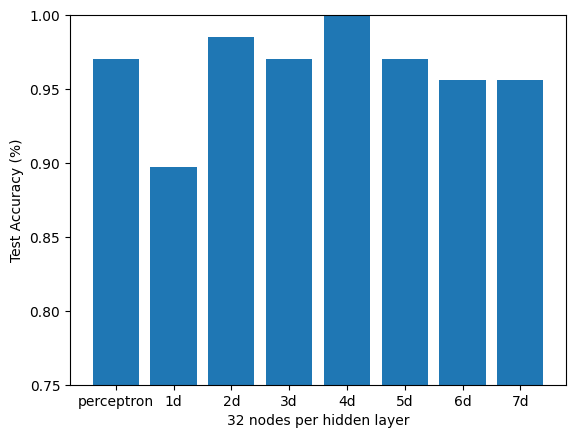

In [100]:
import matplotlib.pyplot as plt
modelNames.insert(0, 'perceptron')
scores.insert(0, p.score(X_test, y_test) )

plt.bar(modelNames,scores)
plt.ylim(0.75, 1.0)
plt.ylabel('Test Accuracy (%)') 
plt.xlabel(str(NODES_PER_HIDDEN_LAYER) + " nodes per hidden layer")
plt.show()

In [101]:
probabilities = [model.predict(X_test) for model in models]

# Convert probabilities to class labels
predicted_labels = [np.argmax(prob, axis=1) for prob in probabilities]

# Assuming y_test is your actual labels
# Convert y_test to class labels if it's not already in that format
# This step depends on how y_test is structured. If it's one-hot encoded, you might need to use np.argmax(y_test, axis=1)

# Print predicted and actual labels for each model
# Assuming `models` is a list of models
for idx, model in enumerate(models):
    # Make predictions for the current model
    y_pred_model = model.predict(X_test)
    y_pred_class = np.argmax(y_pred_model, axis=1)
    print(classification_report(y_test, y_pred_class))


3/3 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       0.56      1.00      0.72        38
           1       0.00      0.00      0.00        30

    accuracy                           0.56        68
   macro avg       0.28      0.50      0.36        68
weighted avg       0.31      0.56      0.40        68

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.56      1.00      0.72        38
           1       0.00      0.00      0.00        30

    accuracy                           0.56        68
   macro avg       0.28      0.50      0.36        68
weighted avg       0.31      0.56      0.40        68

3/3 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       0.56      1.00      0.72        38
           1       0.00      0.00      0.00        30

    accuracy                   

c:\Users\K-Gen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\K-Gen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\K-Gen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

3/3 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       0.56      1.00      0.72        38
           1       0.00      0.00      0.00        30

    accuracy                           0.56        68
   macro avg       0.28      0.50      0.36        68
weighted avg       0.31      0.56      0.40        68

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.56      1.00      0.72        38
           1       0.00      0.00      0.00        30

    accuracy                           0.56        68
   macro avg       0.28      0.50      0.36        68
weighted avg       0.31      0.56      0.40        68

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.56      1.00      0.72        38
           1       0.00      0.00      0.00        30

    accuracy                  

c:\Users\K-Gen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\K-Gen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\K-Gen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif